# Algo Trading Notebook

## Initiation

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web 

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


ModuleNotFoundError: No module named 'pandas_datareader'

In [2]:
style.use('ggplot')
start = dt.datetime(2000,1,1)
end = dt.datetime(2019,1,1)

In [3]:
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

## Data manipulation - 100 ma

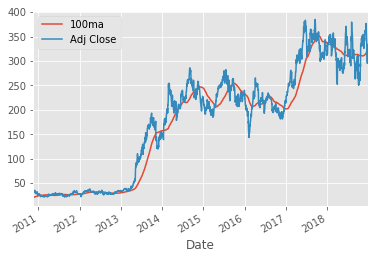

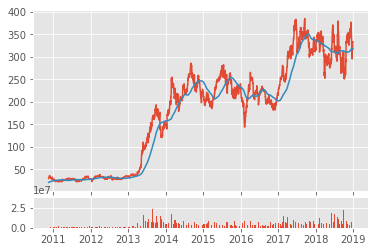

In [4]:
# 100 moving average
df['100ma'] = df['Adj Close'].rolling(window=100).mean()
df.dropna(inplace=True)
df[['100ma', 'Adj Close']].plot()
plt.show()

# 2 sub graphs one displaying 2 lines on 1 graph with vol below it
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan=1, colspan=1, sharex = ax1)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

## Data manipulation - resampling

In [5]:
# open high low close
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

print(df_ohlc.head())

                 open       high        low      close
Date                                                  
2010-11-17  29.490000  35.470001  29.490000  35.320000
2010-11-27  34.330002  35.330002  30.309999  30.309999
2010-12-07  31.559999  32.369999  28.530001  30.809999
2010-12-17  31.360001  32.630001  30.090000  30.090000
2010-12-27  25.549999  27.730000  25.549999  26.830000


In [6]:
# creating a candlestick ohlc
df_ohlc.reset_index(inplace=True)
# converting dates to mdates i.e. really big numbers
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

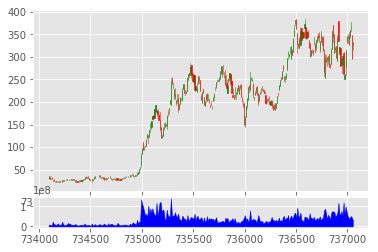

In [8]:
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan=1, colspan=1, sharex = ax1)

# create the candlestick graph
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')

# fill from 0 to the y for volumes
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0, color='b')

plt.show()

Notice the dates on the bottom are in mdate format as opposed to normal